In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [3]:
drop_ls = ["station_nbr","date","sunrise", "sunset", "codesum"]
df_weather_drop = df_weather.drop(drop_ls, axis=1)
df_weather_drop.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,53,34,44,M,35,41,21,0,M,0.00,29.90,29.99,4.5,03,5.3
20513,59,34,47,M,32,41,18,0,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,68,50,59,M,39,50,6,0,0.0,0.00,29.57,30.27,10.5,36,11.2


In [4]:
cf.isThereNoneData(df_weather_drop)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.0
1,tmin,20517,908,4.43,0,0.00,0,0.0
2,tavg,20517,1469,7.16,0,0.00,0,0.0
3,depart,20517,11511,56.10,0,0.00,0,0.0
4,dewpoint,20517,666,3.25,0,0.00,0,0.0
5,wetbulb,20517,1252,6.10,0,0.00,0,0.0
6,heat,20517,1469,7.16,0,0.00,0,0.0
7,cool,20517,1469,7.16,0,0.00,0,0.0
8,snowfall,20517,7224,35.21,311,1.52,0,0.0
9,preciptotal,20517,860,4.19,2410,11.75,0,0.0


In [5]:
df_weather_drop_nonM = cf.remove_m_row(df_weather_drop)
df_weather_drop_nonM.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8763


,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_weather_drop_nonM.values, i) for i in range(df_weather_drop_nonM.shape[1])]
vif["features"] = df_weather_drop_nonM.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.108916,snowfall
1,1.140053,resultdir
2,1.182985,preciptotal
3,1.377830,depart
4,1.611556,stnpressure
5,1.905672,sealevel
6,8.157570,resultspeed
7,8.834553,avgspeed
8,96.121497,dewpoint
9,313.719123,wetbulb


### tmax, tmin 삭제

In [7]:
drop_ls_1 = ["station_nbr","date","sunrise", "sunset", "codesum", "tmax", "tmin"]
df_weather_drop_1 = df_weather.drop(drop_ls_1, axis=1)
df_weather_drop_1.tail()

,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,44,M,35,41,21,0,M,0.00,29.90,29.99,4.5,03,5.3
20513,47,M,32,41,18,0,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,59,M,39,50,6,0,0.0,0.00,29.57,30.27,10.5,36,11.2


In [8]:
df_weather_drop_nonM_1 = cf.remove_m_row(df_weather_drop_1)
df_weather_drop_nonM_1.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8763


,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20507,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1
20510,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5
20511,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6
20514,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2
20515,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9


In [9]:
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] = [variance_inflation_factor(df_weather_drop_nonM_1.values, i) for i in range(df_weather_drop_nonM_1.shape[1])]
vif_1["features"] = df_weather_drop_nonM_1.columns
vif_1 = vif_1.sort_values("VIF Factor").reset_index(drop=True)
vif_1

,VIF Factor,features
0,1.108833,snowfall
1,1.136262,resultdir
2,1.174026,preciptotal
3,1.366198,depart
4,1.595787,stnpressure
5,1.902218,sealevel
6,8.062364,resultspeed
7,8.833752,avgspeed
8,90.967992,dewpoint
9,309.795815,wetbulb


### tavg > sealevel > stnpressure > wetbulb 삭제

In [10]:
drop_ls_2 = ["station_nbr","date","sunrise", "sunset", "codesum", "tavg", "sealevel", "stnpressure", "wetbulb"]

df_weather_drop_2 = df_weather.drop(drop_ls_2, axis=1)
df_weather_drop_2.tail()

,tmax,tmin,depart,dewpoint,heat,cool,snowfall,preciptotal,resultspeed,resultdir,avgspeed
20512,53,34,M,35,21,0,M,0.00,4.5,03,5.3
20513,59,34,M,32,18,0,0.0,0.00,9.2,01,9.3
20514,67,49,-4,40,7,0,0.0,0.00,10.6,36,11.2
20515,45,33,-6,24,26,0,0.1,0.02,20.4,34,20.9
20516,68,50,M,39,6,0,0.0,0.00,10.5,36,11.2


In [11]:
cf.isThereNoneData(df_weather_drop_2)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.0
1,tmin,20517,908,4.43,0,0.00,0,0.0
2,depart,20517,11511,56.10,0,0.00,0,0.0
3,dewpoint,20517,666,3.25,0,0.00,0,0.0
4,heat,20517,1469,7.16,0,0.00,0,0.0
5,cool,20517,1469,7.16,0,0.00,0,0.0
6,snowfall,20517,7224,35.21,311,1.52,0,0.0
7,preciptotal,20517,860,4.19,2410,11.75,0,0.0
8,resultspeed,20517,589,2.87,0,0.00,0,0.0
9,resultdir,20517,589,2.87,0,0.00,0,0.0


In [12]:
df_weather_drop_nonM_2 = cf.remove_m_row(df_weather_drop_2)
df_weather_drop_nonM_2.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'depart', 'dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'dewpoint', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8884


,tmax,tmin,depart,dewpoint,heat,cool,snowfall,preciptotal,resultspeed,resultdir,avgspeed
20507,75.0,50.0,-2.0,53.0,2.0,0.0,0.0,0.00,5.3,30.0,6.1
20510,60.0,38.0,-7.0,31.0,16.0,0.0,0.0,0.00,11.9,1.0,12.5
20511,50.0,32.0,-2.0,34.0,24.0,0.0,0.0,0.00,0.3,3.0,0.6
20514,67.0,49.0,-4.0,40.0,7.0,0.0,0.0,0.00,10.6,36.0,11.2
20515,45.0,33.0,-6.0,24.0,26.0,0.0,0.1,0.02,20.4,34.0,20.9


In [13]:
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(df_weather_drop_nonM_2.values, i) for i in range(df_weather_drop_nonM_2.shape[1])]
vif_2["features"] = df_weather_drop_nonM_2.columns
vif_2 = vif_2.sort_values("VIF Factor").reset_index(drop=True)
vif_2

,VIF Factor,features
0,1.106714,snowfall
1,1.273523,preciptotal
2,1.283765,depart
3,2.829128,heat
4,3.851991,cool
5,5.255264,resultdir
6,26.536374,resultspeed
7,39.583314,avgspeed
8,80.527076,tmax
9,100.024915,dewpoint


### depart(M data 56%) 제거한 경우 VIF 차이

In [14]:
drop_ls_3 = ["station_nbr","date","sunrise", "sunset", "codesum", "tavg", "sealevel", "stnpressure", "wetbulb", "depart"]

df_weather_drop_3 = df_weather.drop(drop_ls_3, axis=1)
df_weather_drop_3.tail()

,tmax,tmin,dewpoint,heat,cool,snowfall,preciptotal,resultspeed,resultdir,avgspeed
20512,53,34,35,21,0,M,0.00,4.5,03,5.3
20513,59,34,32,18,0,0.0,0.00,9.2,01,9.3
20514,67,49,40,7,0,0.0,0.00,10.6,36,11.2
20515,45,33,24,26,0,0.1,0.02,20.4,34,20.9
20516,68,50,39,6,0,0.0,0.00,10.5,36,11.2


In [15]:
cf.isThereNoneData(df_weather_drop_3)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.0
1,tmin,20517,908,4.43,0,0.00,0,0.0
2,dewpoint,20517,666,3.25,0,0.00,0,0.0
3,heat,20517,1469,7.16,0,0.00,0,0.0
4,cool,20517,1469,7.16,0,0.00,0,0.0
5,snowfall,20517,7224,35.21,311,1.52,0,0.0
6,preciptotal,20517,860,4.19,2410,11.75,0,0.0
7,resultspeed,20517,589,2.87,0,0.00,0,0.0
8,resultdir,20517,589,2.87,0,0.00,0,0.0
9,avgspeed,20517,875,4.26,0,0.00,0,0.0


In [16]:
df_weather_drop_nonM_3 = cf.remove_m_row(df_weather_drop_3)
df_weather_drop_nonM_3.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'dewpoint', 'heat', 'cool']
제거한 float 컬럼 : ['snowfall', 'preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 13084


,tmax,tmin,dewpoint,heat,cool,snowfall,preciptotal,resultspeed,resultdir,avgspeed
20511,50.0,32.0,34.0,24.0,0.0,0.0,0.00,0.3,3.0,0.6
20513,59.0,34.0,32.0,18.0,0.0,0.0,0.00,9.2,1.0,9.3
20514,67.0,49.0,40.0,7.0,0.0,0.0,0.00,10.6,36.0,11.2
20515,45.0,33.0,24.0,26.0,0.0,0.1,0.02,20.4,34.0,20.9
20516,68.0,50.0,39.0,6.0,0.0,0.0,0.00,10.5,36.0,11.2


In [17]:
vif_3 = pd.DataFrame()
vif_3["VIF Factor"] = [variance_inflation_factor(df_weather_drop_nonM_3.values, i) for i in range(df_weather_drop_nonM_3.shape[1])]
vif_3["features"] = df_weather_drop_nonM_3.columns
vif_3 = vif_3.sort_values("VIF Factor").reset_index(drop=True)
vif_3

,VIF Factor,features
0,1.090151,snowfall
1,1.242681,preciptotal
2,2.461826,heat
3,4.071443,cool
4,5.100442,resultdir
5,25.532454,resultspeed
6,37.200521,avgspeed
7,80.248378,tmax
8,99.261271,dewpoint
9,177.457804,tmin


### depart(M data 56%)와 snowfall(M data 35%) 제거한 경우 VIF 차이

In [18]:
drop_ls_4 = ["station_nbr","date","sunrise", "sunset", "codesum", "tavg", "sealevel", "stnpressure", "wetbulb", "depart", "snowfall"]

df_weather_drop_4 = df_weather.drop(drop_ls_4, axis=1)
df_weather_drop_4.tail()

,tmax,tmin,dewpoint,heat,cool,preciptotal,resultspeed,resultdir,avgspeed
20512,53,34,35,21,0,0.00,4.5,03,5.3
20513,59,34,32,18,0,0.00,9.2,01,9.3
20514,67,49,40,7,0,0.00,10.6,36,11.2
20515,45,33,24,26,0,0.02,20.4,34,20.9
20516,68,50,39,6,0,0.00,10.5,36,11.2


In [19]:
cf.isThereNoneData(df_weather_drop_4)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.0
1,tmin,20517,908,4.43,0,0.00,0,0.0
2,dewpoint,20517,666,3.25,0,0.00,0,0.0
3,heat,20517,1469,7.16,0,0.00,0,0.0
4,cool,20517,1469,7.16,0,0.00,0,0.0
5,preciptotal,20517,860,4.19,2410,11.75,0,0.0
6,resultspeed,20517,589,2.87,0,0.00,0,0.0
7,resultdir,20517,589,2.87,0,0.00,0,0.0
8,avgspeed,20517,875,4.26,0,0.00,0,0.0


In [20]:
df_weather_drop_nonM_4 = cf.remove_m_row(df_weather_drop_4)
df_weather_drop_nonM_4.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'dewpoint', 'heat', 'cool', 'preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'dewpoint', 'heat', 'cool']
제거한 float 컬럼 : ['preciptotal', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 18882


,tmax,tmin,dewpoint,heat,cool,preciptotal,resultspeed,resultdir,avgspeed
20512,53.0,34.0,35.0,21.0,0.0,0.00,4.5,3.0,5.3
20513,59.0,34.0,32.0,18.0,0.0,0.00,9.2,1.0,9.3
20514,67.0,49.0,40.0,7.0,0.0,0.00,10.6,36.0,11.2
20515,45.0,33.0,24.0,26.0,0.0,0.02,20.4,34.0,20.9
20516,68.0,50.0,39.0,6.0,0.0,0.00,10.5,36.0,11.2


In [21]:
vif_4 = pd.DataFrame()
vif_4["VIF Factor"] = [variance_inflation_factor(df_weather_drop_nonM_4.values, i) for i in range(df_weather_drop_nonM_4.shape[1])]
vif_4["features"] = df_weather_drop_nonM_4.columns
vif_4 = vif_4.sort_values("VIF Factor").reset_index(drop=True)
vif_4

,VIF Factor,features
0,1.238117,preciptotal
1,2.494577,heat
2,3.650167,cool
3,5.171122,resultdir
4,23.589803,resultspeed
5,36.010478,avgspeed
6,77.048235,tmax
7,81.397771,dewpoint
8,162.869544,tmin


### 결론)
- weather date의 VIF 결과, 'tavg", "sealevel", "stnpressure", "wetbulb"을 제외하는 것이 가장 합리적이다
    - "sunrise", "sunset", "codesum"은 우선 제외
    - 위 columns를 제거한 VIF 결과는 Depart, snowfall의 제거 여부에 영향받지 않는다

### sunrise, sunset 데이터 sunrise_minutes, sunset_minutes로 처리

In [22]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [23]:
# 기본제거 column에서 sunset, sunrise 제외
drop_ls_dft = ["station_nbr","date", "codesum"]

df_weather_drop_dft = df_weather.drop(drop_ls_dft, axis=1)
df_weather_drop_dft.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,53,34,44,M,35,41,21,0,-,-,M,0.00,29.90,29.99,4.5,03,5.3
20513,59,34,47,M,32,41,18,0,-,-,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,67,49,58,-4,40,50,7,0,0644,1738,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,45,33,39,-6,24,32,26,0,0624,1646,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,68,50,59,M,39,50,6,0,-,-,0.0,0.00,29.57,30.27,10.5,36,11.2


In [24]:
def changeType_forsun(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    else:
        return a

In [25]:
cf.isThereNoneData(df_weather_drop_dft)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.00
1,tmin,20517,908,4.43,0,0.00,0,0.00
2,tavg,20517,1469,7.16,0,0.00,0,0.00
3,depart,20517,11511,56.10,0,0.00,0,0.00
4,dewpoint,20517,666,3.25,0,0.00,0,0.00
5,wetbulb,20517,1252,6.10,0,0.00,0,0.00
6,heat,20517,1469,7.16,0,0.00,0,0.00
7,cool,20517,1469,7.16,0,0.00,0,0.00
8,sunrise,20517,0,0.00,0,0.00,9656,47.06
9,sunset,20517,0,0.00,0,0.00,9656,47.06


In [26]:
# sunrise, sunset에서만 "-" 데이터 np.nan으로 변환 후 nan row 삭제
df_weather_drop_dft_del_sunrow = df_weather_drop_dft.copy()
df_weather_drop_dft_del_sunrow["sunrise"] = df_weather_drop_dft_del_sunrow["sunrise"].apply(changeType_forsun)
df_weather_drop_dft_del_sunrow["sunset"] = df_weather_drop_dft_del_sunrow["sunset"].apply(changeType_forsun)
df_weather_drop_dft_del_sunrow = df_weather_drop_dft_del_sunrow.dropna()

In [27]:
cf.isThereNoneData(df_weather_drop_dft_del_sunrow)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,10861,806,7.42,0,0.00,0,0.0
1,tmin,10861,808,7.44,0,0.00,0,0.0
2,tavg,10861,859,7.91,0,0.00,0,0.0
3,depart,10861,1855,17.08,0,0.00,0,0.0
4,dewpoint,10861,540,4.97,0,0.00,0,0.0
5,wetbulb,10861,994,9.15,0,0.00,0,0.0
6,heat,10861,859,7.91,0,0.00,0,0.0
7,cool,10861,859,7.91,0,0.00,0,0.0
8,sunrise,10861,0,0.00,0,0.00,0,0.0
9,sunset,10861,0,0.00,0,0.00,0,0.0


In [28]:
df_weather_drop_dft_del_sunrow.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20507,75,50,63,-2,53,57,2,0,0640,1740,0.0,0.00,29.82,29.85,5.3,30,6.1
20510,60,38,49,-7,31,42,16,0,0651,1737,0.0,0.00,28.98,30.36,11.9,01,12.5
20511,50,32,41,-2,34,38,24,0,0619,1640,0.0,0.00,29.65,30.03,0.3,03,0.6
20514,67,49,58,-4,40,50,7,0,0644,1738,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,45,33,39,-6,24,32,26,0,0624,1646,0.1,0.02,29.51,30.24,20.4,34,20.9


In [29]:
def getMinutes(a):
    return (float(str(a).strip()[:2]) * 60)+ float(str(a).strip()[2:])

In [30]:
# sunrise, sunset 데이터를 분단위로 변환한 sunrise_minutes, sunset_minutes 열 생성 및 sunrise, sunset 열 삭제
df_weather_with_sunminutes = df_weather_drop_dft_del_sunrow.copy()
df_weather_with_sunminutes["sunrise_minutes"] = df_weather_with_sunminutes["sunrise"].apply(getMinutes)
df_weather_with_sunminutes["sunset_minutes"] = df_weather_with_sunminutes["sunset"].apply(getMinutes)
df_weather_with_sunminutes = df_weather_with_sunminutes.drop(["sunrise","sunset"], axis=1)
df_weather_with_sunminutes.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [31]:
cf.isThereNoneData(df_weather_with_sunminutes)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,10861,806,7.42,0,0.00,0,0.0
1,tmin,10861,808,7.44,0,0.00,0,0.0
2,tavg,10861,859,7.91,0,0.00,0,0.0
3,depart,10861,1855,17.08,0,0.00,0,0.0
4,dewpoint,10861,540,4.97,0,0.00,0,0.0
5,wetbulb,10861,994,9.15,0,0.00,0,0.0
6,heat,10861,859,7.91,0,0.00,0,0.0
7,cool,10861,859,7.91,0,0.00,0,0.0
8,snowfall,10861,1840,16.94,267,2.46,0,0.0
9,preciptotal,10861,807,7.43,1232,11.34,0,0.0


In [32]:
def getMonth(a):
    return str(a).strip().split("-")[1]

In [33]:
# VIF분석을 위해 나머지 열에서 m데이터 있는 row 삭제
df_weather_with_sunminutes_del_allrow = cf.remove_m_row(df_weather_with_sunminutes)
df_weather_with_sunminutes_del_allrow.tail()

원본 데이터프레임 length : 10861
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'sunrise_minutes', 'sunset_minutes']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8763


,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1,400.0,1060.0
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5,411.0,1057.0
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6,379.0,1000.0
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2,404.0,1058.0
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9,384.0,1006.0


In [34]:
vif_5 = pd.DataFrame()
vif_5["VIF Factor"] = [variance_inflation_factor(df_weather_with_sunminutes_del_allrow.values, i) for i in range(df_weather_with_sunminutes_del_allrow.shape[1])]
vif_5["features"] = df_weather_with_sunminutes_del_allrow.columns
vif_5 = vif_5.sort_values("VIF Factor").reset_index(drop=True)
vif_5

,VIF Factor,features
0,1.109420,snowfall
1,1.161141,resultdir
2,1.184609,preciptotal
3,1.648914,stnpressure
4,1.853418,depart
5,1.924197,sealevel
6,2.292907,sunrise_minutes
7,4.770318,sunset_minutes
8,8.231073,resultspeed
9,9.091756,avgspeed


In [35]:
df_weather_with_sunminutes_del_allrow.corr()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
tmax,1.000000,0.919014,0.980702,0.387702,0.889610,0.948411,-0.922951,0.770697,-0.208339,-0.009978,-0.000574,-0.351730,-0.137484,-0.221672,-0.124407,-0.418408,0.717420
tmin,0.919014,1.000000,0.978170,0.366930,0.947730,0.974941,-0.898960,0.803826,-0.171873,0.072277,-0.041253,-0.396848,-0.052721,-0.255418,-0.048485,-0.464465,0.718679
tavg,0.980702,0.978170,1.000000,0.386041,0.936796,0.981220,-0.930416,0.803247,-0.194483,0.030452,-0.020955,-0.381251,-0.098250,-0.242943,-0.089293,-0.449896,0.732904
depart,0.387702,0.366930,0.386041,1.000000,0.365832,0.374536,-0.391840,0.257006,-0.065601,-0.031680,-0.184078,-0.410370,0.075813,-0.024487,0.110915,0.028618,-0.018278
dewpoint,0.889610,0.947730,0.936796,0.365832,1.000000,0.983189,-0.893542,0.716835,-0.159064,0.132624,0.025247,-0.396333,-0.129368,-0.271784,-0.126465,-0.448711,0.666601
wetbulb,0.948411,0.974941,0.981220,0.374536,0.983189,1.000000,-0.931292,0.758341,-0.187663,0.086078,0.009737,-0.390716,-0.115858,-0.261672,-0.109939,-0.461792,0.714002
heat,-0.922951,-0.898960,-0.930416,-0.391840,-0.893542,-0.931292,1.000000,-0.529046,0.232432,-0.052580,0.009079,0.346510,0.120734,0.235274,0.105098,0.444727,-0.671582
cool,0.770697,0.803826,0.803247,0.257006,0.716835,0.758341,-0.529046,1.000000,-0.072548,-0.014947,-0.033762,-0.319584,-0.031268,-0.180132,-0.035940,-0.318901,0.605481
snowfall,-0.208339,-0.171873,-0.194483,-0.065601,-0.159064,-0.187663,0.232432,-0.072548,1.000000,0.112171,-0.029089,-0.013241,0.051914,-0.017240,0.052342,0.081219,-0.135250
preciptotal,-0.009978,0.072277,0.030452,-0.031680,0.132624,0.086078,-0.052580,-0.014947,0.112171,1.000000,-0.057441,-0.159147,-0.023935,-0.040575,0.035605,-0.065574,0.056744


In [36]:
# sunrise_minutes, sunset_minutes 데이터 log값 변환
df_weather_with_sunminutes_del_allrow_log = df_weather_with_sunminutes_del_allrow.copy()
df_weather_with_sunminutes_del_allrow_log["sunrise_minutes"] = df_weather_with_sunminutes_del_allrow_log["sunrise_minutes"].apply(lambda a : np.log(a))
df_weather_with_sunminutes_del_allrow_log["sunset_minutes"] = df_weather_with_sunminutes_del_allrow_log["sunset_minutes"].apply(lambda a : np.log(a))
df_weather_with_sunminutes_del_allrow_log.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1,5.991465,6.966024
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5,6.018593,6.963190
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6,5.937536,6.907755
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2,6.001415,6.964136
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9,5.950643,6.913737


In [37]:
# log값 취하기 전 후 VIF는 tmin, tmax와 cool의 순서만 바뀌고 나머지는 영향없음 >>> tavg, sealevel
vif_6 = pd.DataFrame()
vif_6["VIF Factor"] = [variance_inflation_factor(df_weather_with_sunminutes_del_allrow_log.values, i) for i in range(df_weather_with_sunminutes_del_allrow_log.shape[1])]
vif_6["features"] = df_weather_with_sunminutes_del_allrow_log.columns
vif_6 = vif_6.sort_values("VIF Factor").reset_index(drop=True)
vif_6

,VIF Factor,features
0,1.109391,snowfall
1,1.163664,resultdir
2,1.184457,preciptotal
3,1.648851,stnpressure
4,1.860331,depart
5,1.919727,sealevel
6,2.190267,sunrise_minutes
7,4.760492,sunset_minutes
8,8.230501,resultspeed
9,9.098276,avgspeed


In [38]:
# corr 높은 column 삭제하고 재분석시 프로세스
# 1. remove_m_row 전단계의 DataFrame에서 해당 column 삭제
# 2. remove_m_row 실시
# 3. VIF

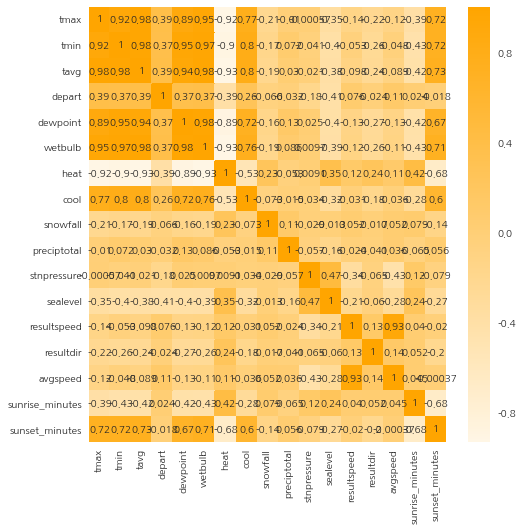

In [39]:
cmap = sns.light_palette("orange", as_cmap=True)
plt.figure(figsize=(8,8))
sns.heatmap(df_weather_with_sunminutes_del_allrow_log.corr(), annot=True, cmap=cmap)
plt.show()

### sunrise_minutes, sunset_minutes column의 missing data filling
- sunrise, sunset의 m data row를 지우고 난 뒤 계산한 sunrise_minutes, sunset_minutes column을 `m data row를 지우기 전 DataFrame`에 추가
    - `df_weather_drop_dft`에 `df_weather_with_sunminutes`의 sunrise_minutes, sunset_minutes column을 추가
- 그 DataFrame에서 sunrise_minutes, sunset_minutes column에 interpolate(선형계산) 적용해서 nan data filling

In [40]:
df_weather.tail(10)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20507,11,2014-10-31,75,50,63,-2,53,57,2,0,0640,1740,,0.0,0.00,29.82,29.85,5.3,30,6.1
20508,12,2014-10-31,75,60,68,M,53,59,0,3,-,-,BR,0.0,0.00,29.80,29.85,7.0,32,7.5
20509,13,2014-10-31,58,35,47,M,28,37,18,0,-,-,,M,0.00,24.36,30.18,6.1,17,7.2
20510,14,2014-10-31,60,38,49,-7,31,42,16,0,0651,1737,,0.0,0.00,28.98,30.36,11.9,01,12.5
20511,15,2014-10-31,50,32,41,-2,34,38,24,0,0619,1640,,0.0,0.00,29.65,30.03,0.3,03,0.6
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [41]:
df_weather_with_sunminutes.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [42]:
df_weather_index = df_weather.reset_index(drop=False)
df_weather_index.tail()

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,53,34,44,M,35,41,21,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,59,34,47,M,32,41,18,...,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,67,49,58,-4,40,50,7,...,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,45,33,39,-6,24,32,26,...,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,68,50,59,M,39,50,6,...,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [43]:
df_weather_with_sunminutes_index = df_weather_with_sunminutes.reset_index(drop=False)
df_weather_with_sunminutes_index.tail()

,index,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
10856,20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
10857,20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
10858,20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
10859,20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
10860,20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [44]:
df_weather_with_sunminutes_only_index = df_weather_with_sunminutes_index[["index","sunrise_minutes","sunset_minutes"]]
df_weather_with_sunminutes_only_index.tail()

,index,sunrise_minutes,sunset_minutes
10856,20507,400.0,1060.0
10857,20510,411.0,1057.0
10858,20511,379.0,1000.0
10859,20514,404.0,1058.0
10860,20515,384.0,1006.0


In [72]:
# ★★★선형적으로 nan값을 채우기 전의, 원래 데이터에 sunrise_minutes, sunset_minutes만 합친 완성형 weather dataframe(sunrise, sunset 포함)
df_weather_with_sunminutes = df_weather_index.merge(df_weather_with_sunminutes_only_index, on="index", how="outer" )
df_weather_with_sunminutes[df_weather_with_sunminutes["index"]==20501]

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20501,20501,5,2014-10-31,M,M,M,M,37,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0


In [73]:
cf.isThereNoneData(df_weather_with_sunminutes)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,index,20517,0,0.00,0,0.00,0,0.00
1,station_nbr,20517,0,0.00,0,0.00,0,0.00
2,date,20517,0,0.00,0,0.00,0,0.00
3,tmax,20517,906,4.42,0,0.00,0,0.00
4,tmin,20517,908,4.43,0,0.00,0,0.00
5,tavg,20517,1469,7.16,0,0.00,0,0.00
6,depart,20517,11511,56.10,0,0.00,0,0.00
7,dewpoint,20517,666,3.25,0,0.00,0,0.00
8,wetbulb,20517,1252,6.10,0,0.00,0,0.00
9,heat,20517,1469,7.16,0,0.00,0,0.00


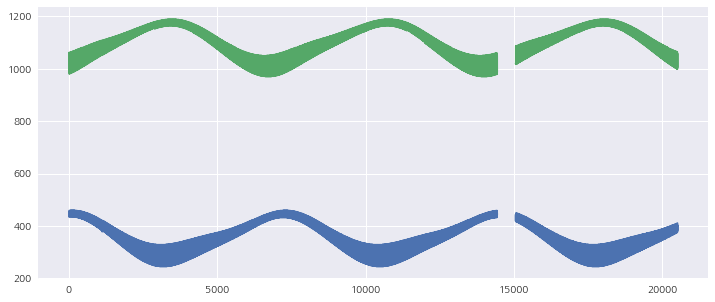

In [77]:
plt.figure(figsize=(12, 5))
plt.plot(df_weather_with_sunminutes[["sunrise_minutes", "sunset_minutes"]])
plt.show()

# item별 units 종속변수를 sunrise, sunset 독립변수로 설명하기 위해서는
# 지역에 상관없이 

In [112]:
df_weather_with_sunminutes_pivot = df_weather_with_sunminutes.copy()
# df_weather_with_sunminutes_pivot = cf.remove_m_row(df_weather_with_sunminutes_pivot, ["sunrise_minutes", "sunset_minutes"])
# df_weather_with_sunminutes_pivot

In [113]:
len(df_weather_with_sunminutes_pivot)

20517

In [ ]:
# pivot_table(values, index, columns, aggfunc)

In [105]:
df_weather_with_sunminutes_pivot["count"] = 1

In [119]:
def isnan(a):
    if np.isnan(a):
        return 0
    else:
        return 1

In [121]:
df_weather_with_sunminutes_pivot["count"] = df_weather_with_sunminutes_pivot["sunrise_minutes"].apply(isnan)

In [122]:
df_weather_with_sunminutes_pivot

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes,count
0,0,1,2012-01-01,52,31,42,M,36,40,23,...,M,0.05,29.78,29.92,3.6,20,4.6,NaN,NaN,0
1,1,2,2012-01-01,48,33,41,16,37,39,24,...,0.0,0.07,28.82,29.91,9.1,23,11.3,436.0,986.0,1
2,2,3,2012-01-01,55,34,45,9,24,36,20,...,0.0,0.00,29.77,30.47,9.9,31,10.0,455.0,1040.0,1
3,3,4,2012-01-01,63,47,55,4,28,43,10,...,0.0,0.00,29.79,30.48,8.0,35,8.2,448.0,1062.0,1
4,4,6,2012-01-01,63,34,49,0,31,43,16,...,0.0,0.00,29.95,30.47,14.0,36,13.8,447.0,1062.0,1
5,5,7,2012-01-01,50,33,42,M,26,35,23,...,0.0,0.00,29.15,30.54,10.3,32,10.2,NaN,NaN,0
6,6,8,2012-01-01,66,45,M,M,34,46,M,...,M,0.00,30.05,M,11.0,36,10.9,NaN,NaN,0
7,7,9,2012-01-01,34,19,27,M,17,23,38,...,M,T,29.34,30.09,22.8,30,22.5,NaN,NaN,0
8,8,10,2012-01-01,73,53,63,M,55,58,2,...,M,0.00,30.16,30.19,5.1,24,5.5,443.0,1058.0,1
9,9,11,2012-01-01,72,48,60,7,54,56,5,...,0.0,0.00,30.15,30.18,4.6,23,4.8,444.0,1057.0,1


In [ ]:
# df_weather_with_sunminutes_pivot["count"] = np.where(pd.notnull(df_weather_with_sunminutes_pivot["count"]) == True, df_weather_ex['depart'], df_weather_ex['tavg'] - df_weather_ex['depart_base'])

In [118]:
df_weather_with_sunminutes_pivot

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes,count
0,0,1,2012-01-01,52,31,42,M,36,40,23,...,M,0.05,29.78,29.92,3.6,20,4.6,NaN,NaN,0.0
1,1,2,2012-01-01,48,33,41,16,37,39,24,...,0.0,0.07,28.82,29.91,9.1,23,11.3,436.0,986.0,436.0
2,2,3,2012-01-01,55,34,45,9,24,36,20,...,0.0,0.00,29.77,30.47,9.9,31,10.0,455.0,1040.0,455.0
3,3,4,2012-01-01,63,47,55,4,28,43,10,...,0.0,0.00,29.79,30.48,8.0,35,8.2,448.0,1062.0,448.0
4,4,6,2012-01-01,63,34,49,0,31,43,16,...,0.0,0.00,29.95,30.47,14.0,36,13.8,447.0,1062.0,447.0
5,5,7,2012-01-01,50,33,42,M,26,35,23,...,0.0,0.00,29.15,30.54,10.3,32,10.2,NaN,NaN,0.0
6,6,8,2012-01-01,66,45,M,M,34,46,M,...,M,0.00,30.05,M,11.0,36,10.9,NaN,NaN,0.0
7,7,9,2012-01-01,34,19,27,M,17,23,38,...,M,T,29.34,30.09,22.8,30,22.5,NaN,NaN,0.0
8,8,10,2012-01-01,73,53,63,M,55,58,2,...,M,0.00,30.16,30.19,5.1,24,5.5,443.0,1058.0,443.0
9,9,11,2012-01-01,72,48,60,7,54,56,5,...,0.0,0.00,30.15,30.18,4.6,23,4.8,444.0,1057.0,444.0


In [123]:
df_weather_with_sunminutes_pivot.pivot_table("count", ["station_nbr"], aggfunc=np.sum)

,count
station_nbr,
1,0
2,1004
3,1004
4,1004
5,821
6,1004
7,0
8,0
9,0


In [74]:
# VIF분석을 위해 나머지 열에서 m데이터 있는 row 삭제
df_weather_with_sunminutes_del_allrow = cf.remove_m_row(df_weather_with_sunminutes)
df_weather_with_sunminutes_del_allrow.tail()

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['index', 'station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'sunrise_minutes', 'sunset_minutes']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8763


,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,20507,11,2014-10-31,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,...,,0.0,0.00,29.82,29.85,5.3,30.0,6.1,400.0,1060.0
20510,20510,14,2014-10-31,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,...,,0.0,0.00,28.98,30.36,11.9,1.0,12.5,411.0,1057.0
20511,20511,15,2014-10-31,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,...,,0.0,0.00,29.65,30.03,0.3,3.0,0.6,379.0,1000.0
20514,20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,...,,0.0,0.00,29.78,30.28,10.6,36.0,11.2,404.0,1058.0
20515,20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,...,RA SN,0.1,0.02,29.51,30.24,20.4,34.0,20.9,384.0,1006.0


In [ ]:
# total_del_nan.pivot_table("Counts", ["sunrise_minutes"], ["sunset_minutes"], aggfunc=np.sum)

In [46]:
df_weather_with_sunminutes["sunrise_minutes"].isna().sum()

9656

In [47]:
len(df_train)

4617600

In [48]:
df_train_key = df_train.merge(df_key, on=["store_nbr"], how="inner")
len(df_train_key)

4617600

In [49]:
df_weather_with_sunminutes.columns

Index(['index', 'station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'sunrise_minutes', 'sunset_minutes'],
      dtype='object')

In [50]:
len(df_weather_with_sunminutes)

20517

In [51]:
total = df_train_key.merge(df_weather_with_sunminutes, on=["date","station_nbr"], how="inner")
len(total)

4617600

In [52]:
total.tail()

,date,store_nbr,item_nbr,units,station_nbr,index,tmax,tmin,tavg,depart,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
4617595,2014-10-31,35,107,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617596,2014-10-31,35,108,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617597,2014-10-31,35,109,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617598,2014-10-31,35,110,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617599,2014-10-31,35,111,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0


In [53]:
total["sunrise_minutes"].isna().sum()

2680539

In [54]:
cf.isThereNoneData(total)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,4617600,0,0.00,0,0.00,0,0.00
1,store_nbr,4617600,0,0.00,0,0.00,0,0.00
2,item_nbr,4617600,0,0.00,0,0.00,0,0.00
3,units,4617600,0,0.00,0,0.00,0,0.00
4,station_nbr,4617600,0,0.00,0,0.00,0,0.00
5,index,4617600,0,0.00,0,0.00,0,0.00
6,tmax,4617600,111444,2.41,0,0.00,0,0.00
7,tmin,4617600,111333,2.41,0,0.00,0,0.00
8,tavg,4617600,187701,4.06,0,0.00,0,0.00
9,depart,4617600,3070038,66.49,0,0.00,0,0.00


In [55]:
import statsmodels.api as sm

In [56]:
total_del_nan = total.copy()
total_del_nan["sunrise_minutes"] = total_del_nan["sunrise_minutes"].apply(changeType_forsun) # nan값으로 변환
total_del_nan["sunset_minutes"] = total_del_nan["sunset_minutes"].apply(changeType_forsun) # nan값으로 변환
total_del_nan = total_del_nan.dropna()

In [57]:
total_del_nan["sunrise_minutes"].isna().sum()

0

In [58]:
total_del_nan["item_nbr"].isna().sum()

0

In [59]:
# df_weather_drop_dft_del_sunrow["sunset"] = df_weather_drop_dft_del_sunrow["sunset"].apply(changeType_forsun)
# df_weather_drop_dft_del_sunrow = df_weather_drop_dft_del_sunrow.dropna()

In [60]:
# total_nonM = cf.remove_m_row(total,["sunrise_minutes", "sunset_minutes"])
# total_nonM.tail()

In [61]:
total_del_nan.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'index',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'sunrise_minutes', 'sunset_minutes'],
      dtype='object')

In [62]:
cf.isThereNoneData(total_del_nan)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,1937061,0,0.00,0,0.00,0,0.0
1,store_nbr,1937061,0,0.00,0,0.00,0,0.0
2,item_nbr,1937061,0,0.00,0,0.00,0,0.0
3,units,1937061,0,0.00,0,0.00,0,0.0
4,station_nbr,1937061,0,0.00,0,0.00,0,0.0
5,index,1937061,0,0.00,0,0.00,0,0.0
6,tmax,1937061,90687,4.68,0,0.00,0,0.0
7,tmin,1937061,90687,4.68,0,0.00,0,0.0
8,tavg,1937061,99123,5.12,0,0.00,0,0.0
9,depart,1937061,389499,20.11,0,0.00,0,0.0


In [65]:
model = sm.OLS.from_formula("units ~ C(item_nbr):sunrise_minutes + 0", data=total_del_nan)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     3620.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:34:43   Log-Likelihood:            -7.1170e+06
No. Observations:             1937061   AIC:                         1.423e+07
Df Residuals:                 1936950   BIC:                         1.424e+07
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(item_n

In [ ]:
# df.pivot(index, columns, values)

In [66]:
# total_del_nan.pivot_table("Counts", ["sunrise_minutes"], ["sunset_minutes"], aggfunc=np.sum)

KeyError: 'Counts'

In [64]:
# df_weather_ex['tmax'] = df_weather_ex['tmax'].interpolate()